<a href="https://colab.research.google.com/github/RFebrians/object-detection-playground/blob/main/Deteksi_Teks_dengan_CRAFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Penggunaan Notebook pada User

For Deteksi AR Teks 


*Pastikan GPU Aktif*

In [ ]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-8abdb2ed-47b6-0a6c-9d15-ba32f198009f)


# Deteksi Teks dengan CRAFT

**Intro**

CRAFT atau Character Region Awareness for Text Detection adalah implementasi Recognition Text Processing (https://arxiv.org/abs/1904.01941) yang bersifat open-source untuk mendeteksi teks pada scene yang ditentukan .




## Install CRAFT

 Install the open source project [CRAFT-pytorch](https://github.com/clovaai/CRAFT-pytorch.git):

In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/clovaai/CRAFT-pytorch.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install
  !git clone -q {git_repo_url}
  #!cd {project_name} && pip install -q -r requirements.txt
  
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

## Download Training Modul 

In [ ]:
def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id={file_id}" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={confirm_text}&id={file_id}" -o {file_name}
  

pretrained_model = 'craft_mlt_25k.pth'
if not exists(pretrained_model):
  # download the pretrained model
  !wget -q -O {pretrained_model} 'https://drive.google.com/uc?authuser=0&id=1Jk4eGD7crsqCCg9C9VjCLkMN3ze8kutZ&export=download'

## Detect scene text on a test image

Ambil gambar dari Internet :

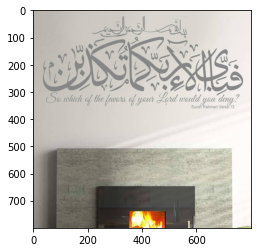

In [ ]:
IMAGE_URL = 'https://ae01.alicdn.com/kf/HTB1wejGV7PoK1RjSZKbq6x1IXXaq.jpg'


image_file_name = basename(IMAGE_URL)
download_dir = '/content/images'
!mkdir -p {download_dir} && rm -rf {download_dir}/*
!wget -q -P {download_dir} {IMAGE_URL}
  

plt.imshow(matplotlib.image.imread(join(download_dir, image_file_name)))

Jalankan CRAFT dari gambar diatas:

In [ ]:
!cd {project_name} && python test.py --trained_model=../{pretrained_model} --test_folder=/content/images

Loading weights from checkpoint (../craft_mlt_25k.pth)
elapsed time : 0.42139291763305664s


Hasil , Deteksi Teks :

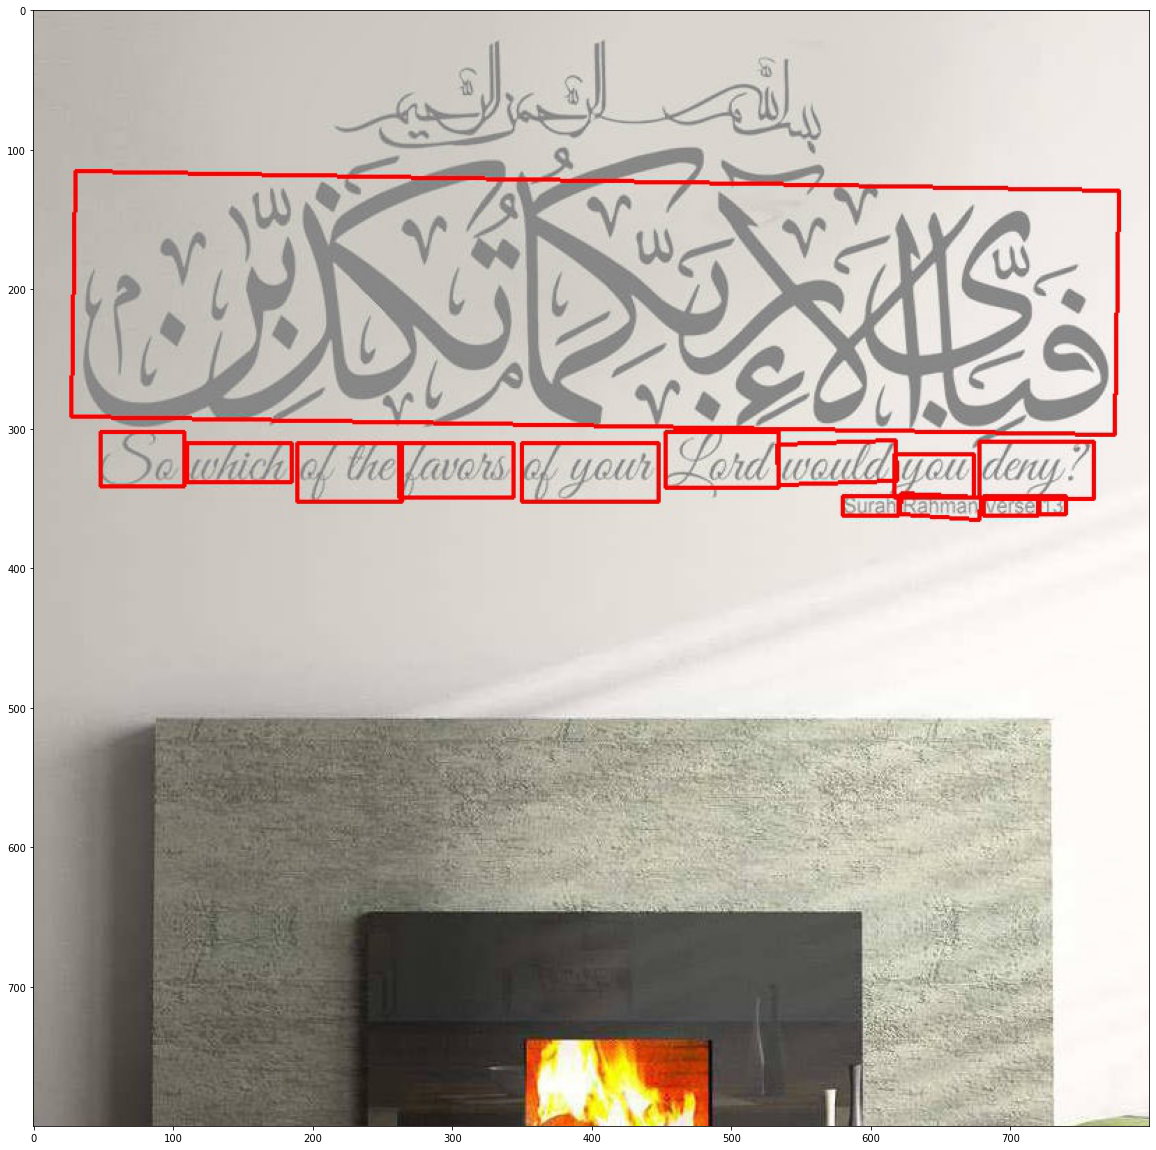

In [ ]:
plt.figure(figsize=(20, 26))
plt.imshow(matplotlib.image.imread(join(project_name, 'result','res_'+image_file_name)))

    Copyright 2020 - 2021




*Semoga tercapai target...*

---


###*Adhimas , Zamri , eKikZ*

---

